In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

In [0]:
datos = datasets.load_iris() #Iris es uno de los "Toy sets" que ofrece sk learn 

In [0]:
datos.target  # Notemos que las categorias en las que se espera clasificar son 3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [0]:
datos.feature_names #Nombres de las features 

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [0]:
datos_iris = pd.DataFrame(datos.data, columns = datos.feature_names)  #Se le da formato a los datos para facilitar el análisis.

datos_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [0]:
datos_iris['Cls'] = datos.target  #Al formato creado anteriormente se le agrega la columna de clases

In [0]:
datos_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cls
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [0]:
correlacion = datos_iris.corr().round(2)  #Se obtiene la matriz de correlación
correlacion

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cls
sepal length (cm),1.00,-0.12,0.87,0.82,0.78
sepal width (cm),-0.12,1.00,-0.43,-0.37,-0.43
petal length (cm),0.87,-0.43,1.00,0.96,0.95
petal width (cm),0.82,-0.37,0.96,1.00,0.96
Cls,0.78,-0.43,0.95,0.96,1.00


Como petal lenght y petal width son los features con mayor correlación con la clase, se usaran estos datos para realizar el modelo.

In [0]:
X = datos.data[:,2:]  # Se guardan los datos a emplear y los features 
Y = datos.target

In [0]:
logreg = LogisticRegression(multi_class='auto') #Multiclas nos permite realizar la clasificación en más de dos clases distintas

In [0]:
logreg.fit(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 # Se obtienen los limites de la grafíca 
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # paso en la red (mesh)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) # Se generan las matrices para formar la red

In [0]:
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()]) #Con base en el modelo obtenido, se evaluan y se clasifican los puntos de la red

In [0]:
Z = Z.reshape(xx.shape) #Ya evaluados los datos los ordenamos de forma que sea posible graficarlos

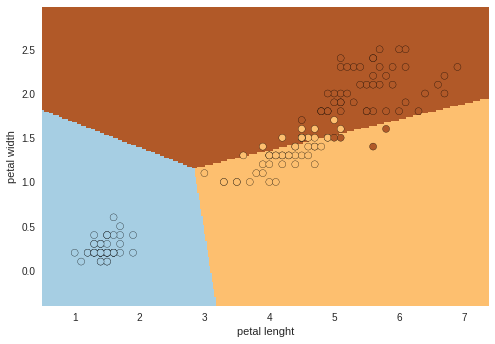

In [0]:

plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired) #Se grafica y se separan los datos segun su clase
plt.scatter(X[:,0],X[:,1],c=Y, edgecolors='black', cmap=plt.cm.Paired)
plt.xlabel("petal lenght")
plt.ylabel("petal width")
plt.show()